<a href="https://colab.research.google.com/github/inikanipp/Algerian_Forest_Fires_Classification_Prediction/blob/main/model/random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset

In [2]:
dataset = pd.read_csv('dataset-Algerian.csv')

#Descriptive Statistic

In [3]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000


## jawaban :
dari hasil statistik deskriptif diatas menunjukkan bahwa semua kolom dapat dilihat untuk statistik deskriptifnya, namun terdapat 2 kolom yang tidak dapat dilihat statistik deskriptifnya yaitu kolom FWI dan CLASSES, untuk CLASSES tidak perlu kita cari statistik deskriptifnya karena merupakan kolom target dan berbentuk kategori, namun pada FWI merupakan angka dan perlu kita rubah tipe datanya dari object menjadi float untuk melihat statistik deskriptifnya.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(6), int64(6), object(2)
memory usage: 26.8+ KB


In [5]:
print(f"nilai unik dari kolom Classes : {dataset['FWI'].unique()}")
print(f"nilai unik dari kolom FWI : {dataset['Classes  '].unique()}")

nilai unik dari kolom Classes : ['0.5' '0.4' '0.1' '0' '2.5' '7.2' '7.1' '0.3' '0.9' '5.6' '7.1 ' '0.2'
 '1.4' '2.2' '2.3' '3.8' '7.5' '8.4' '10.6' '15' '13.9' '3.9' '12.9' '1.7'
 '4.9' '6.8' '3.2' '8' '0.6' '3.4' '0.8' '3.6' '6' '10.9' '4' '8.8' '2.8'
 '2.1' '1.3' '7.3' '15.3' '11.3' '11.9' '10.7' '15.7' '6.1' '2.6' '9.9'
 '11.6' '12.1' '4.2' '10.2' '6.3' '14.6' '16.1' '17.2' '16.8' '18.4'
 '20.4' '22.3' '20.9' '20.3' '13.7' '13.2' '19.9' '30.2' '5.9' '7.7' '9.7'
 '8.3' '0.7' '4.1' '1' '3.1' '1.9' '10' '16.7' '1.2' '5.3' '6.7' '9.5'
 '12' '6.4' '5.2' '3' '9.6' '4.7' 'fire   ' '14.1' '9.1' '13' '17.3' '30'
 '25.4' '16.3' '9' '14.5' '13.5' '19.5' '12.6' '12.7' '21.6' '18.8' '10.5'
 '5.5' '14.8' '24' '26.3' '12.2' '18.1' '24.5' '26.9' '31.1' '30.3' '26.1'
 '16' '19.4' '2.7' '3.7' '10.3' '5.7' '9.8' '19.3' '17.5' '15.4' '15.2'
 '6.5']
nilai unik dari kolom FWI : ['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' nan 'not fire    ']


## Jawaban :
dari cek informasi tipe data diatas, dapat diketahui bahwa kolom FWI memiliki tipe data object dan perlu kita ubah menjadi float untuk mencari statistic deskriptifnya, dan CLASSES memiliki tipe data object yang seharusnya memiliki tipe data categorical

In [6]:
from logging import exception
errorIndication = []


def tryConvert (row) :
  index = dataset.index.get_loc(row.name)
  try :
    dataset.iloc[index,-2] = float(dataset.iloc[index, -2])
    # print("ini adalah", row.name)
    # print(dataset.iloc[index,-2])


  except Exception:
        errorIndication.append(index)

dataset.apply( tryConvert ,axis=1)

print(errorIndication)

for i in errorIndication :
  dataset.drop(i, inplace = True)
  print(i)


[165]
165


# cek apakah baris seudah berhasil dihapus

In [7]:
dataset.shape

(243, 14)

## keterangan :
dari hasil diatas dapat kita cek bahwa terdapat error pada baris ke 165 ketika mengubah ke tipe data float, sehingga kita bisa menghapus baris tersebut dan mengubah tipe data kolom menjadi sebuah float

#ubah kolom ke float dan mengeceknya kembali

In [8]:
dataset['FWI'] = dataset['FWI'].astype('float')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 28.5+ KB


# cek nilai unik kolom classses

In [10]:
dataset['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

## keterangan :
dari output diatas dapat kita amati bahwa data tersebut sebenarnya hanya memiliki 2 kategori namun terdapat perbedaan penulisan sehingga perlu untuk kita cleaning

#Cleaning data in classes column

In [11]:
dataset['Classes  '] = dataset['Classes  '].str.strip()
dataset['Classes  '] = dataset['Classes  '].astype('category')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   day          243 non-null    int64   
 1   month        243 non-null    int64   
 2   year         243 non-null    int64   
 3   Temperature  243 non-null    int64   
 4    RH          243 non-null    int64   
 5    Ws          243 non-null    int64   
 6   Rain         243 non-null    float64 
 7   FFMC         243 non-null    float64 
 8   DMC          243 non-null    float64 
 9   DC           243 non-null    float64 
 10  ISI          243 non-null    float64 
 11  BUI          243 non-null    float64 
 12  FWI          243 non-null    float64 
 13  Classes      243 non-null    category
dtypes: category(1), float64(7), int64(6)
memory usage: 26.9 KB


In [13]:
dataset['Classes  '].unique()

['not fire', 'fire']
Categories (2, object): ['fire', 'not fire']

#2.a | Descriptive Statistic Exploration

In [14]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


#2.b | Distribution Visualisation

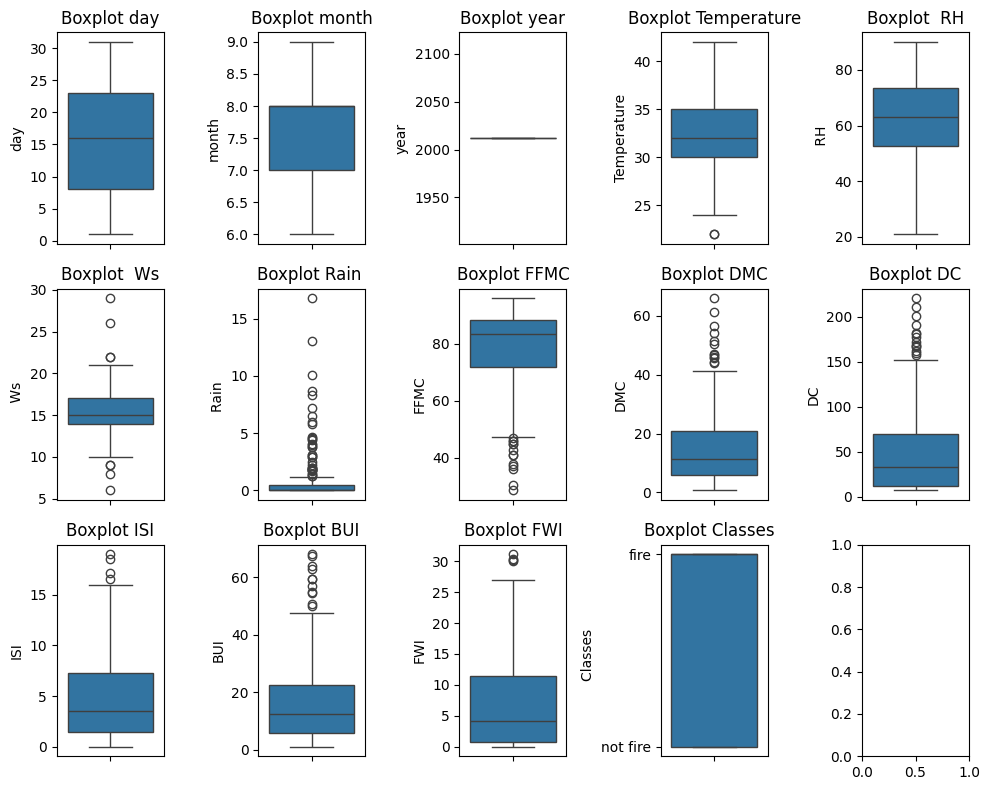

In [15]:
fig, axes = plt.subplots(3, 5, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(dataset.columns):
    sns.boxplot(y=dataset[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

##keterangan :
dari hasil visualisasi diatas terdapat beberapa kolom yang memiliki outlier, hal ini dapat menyebabkan ketidak akuratan model dalam memprediksi data nanti.

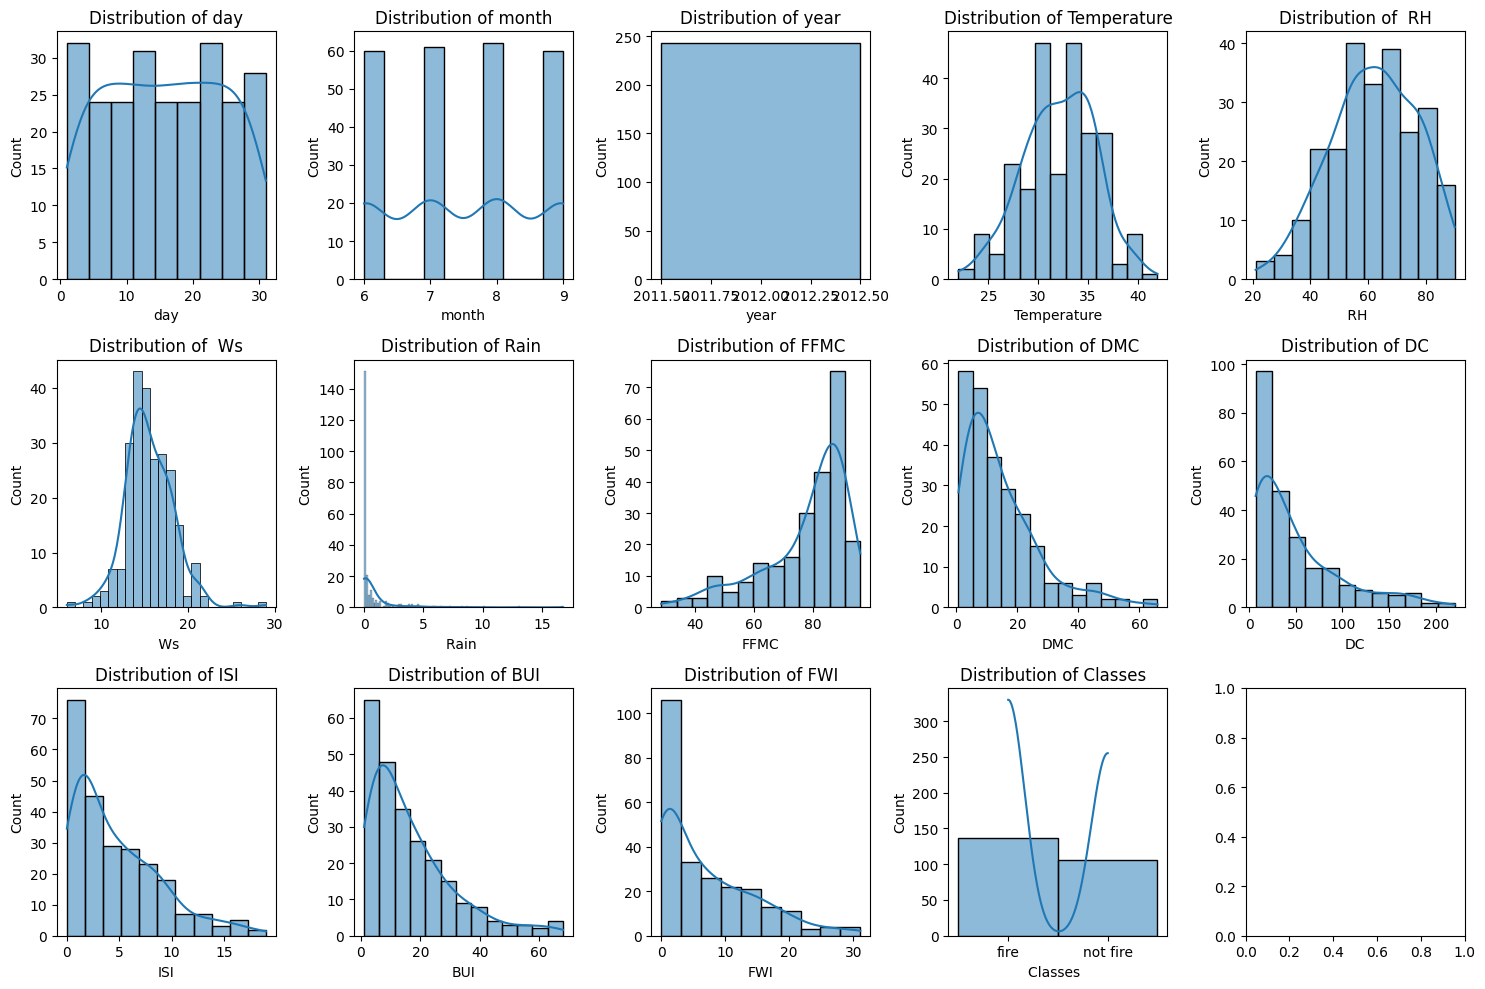

In [16]:
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(dataset.columns):
    sns.histplot(dataset[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#2.c | Analisis tren waktu

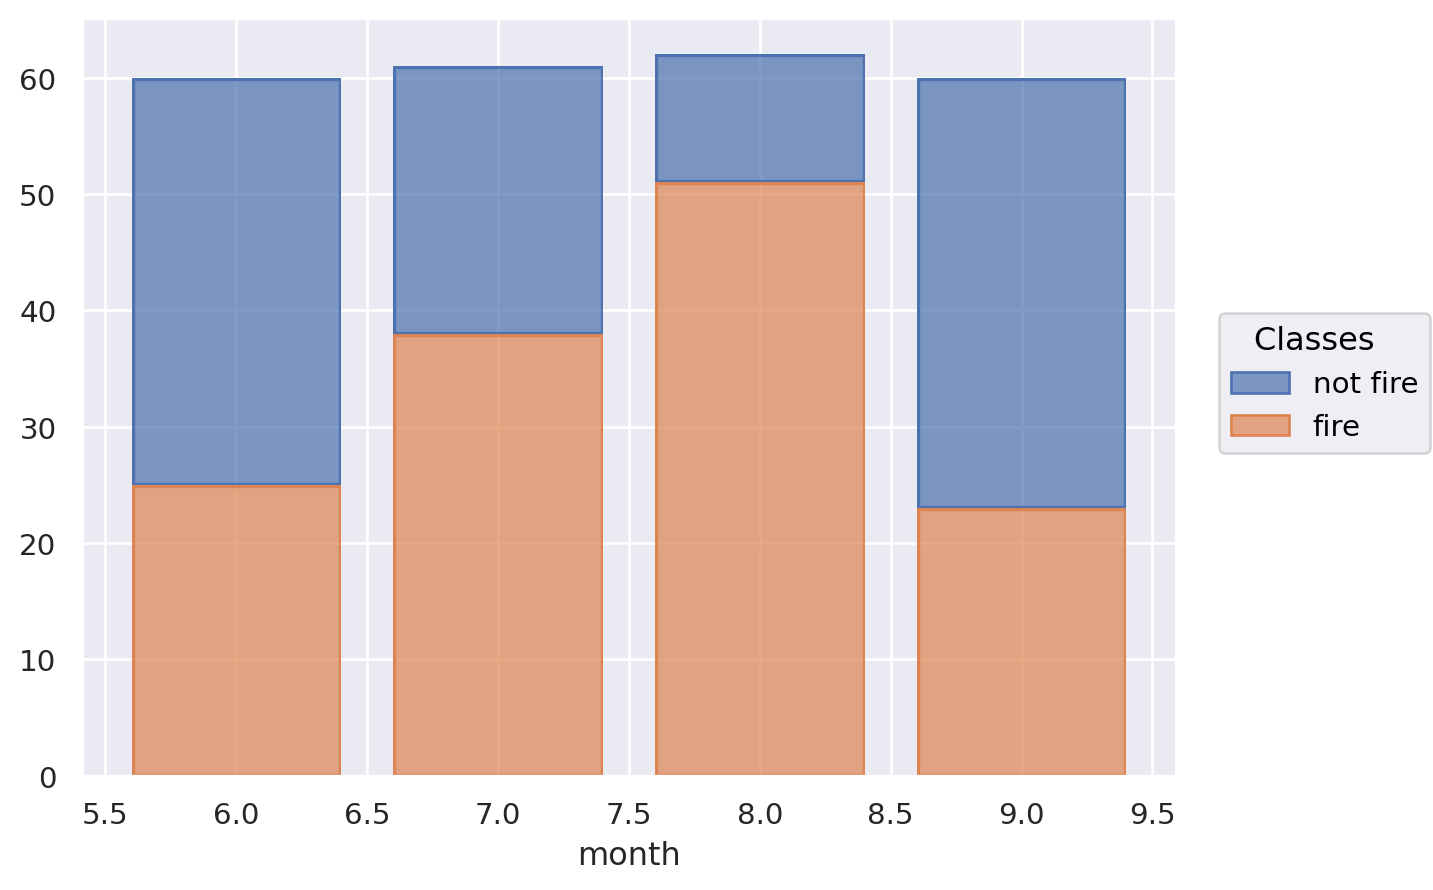

In [29]:
from seaborn import objects as so


so.Plot(dataset, x="day", color="Classes  ").add(so.Bar(), so.Count(), so.Stack())


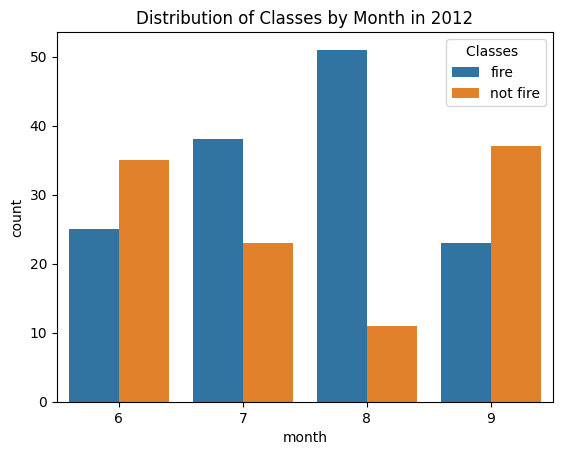

In [39]:
sns.countplot(data=dataset, x="month", hue="Classes  ")
plt.title("Distribution of Classes by Month in 2012")
plt.show()

In [40]:
# Gabungkan jadi format datetime sementara
dataset['days'] = pd.to_datetime(dataset[['year', 'month', 'day']])

# Cari minggu pertama dalam bulan itu
minggu_pertama = dataset['days'].dt.to_period('M').apply(lambda x: x.start_time.isocalendar()[1])

# Hitung minggu dalam bulan
dataset['week in month'] = dataset['days'].dt.isocalendar().week - minggu_pertama + 1


In [41]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days,week in month
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04,2
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05,2


6


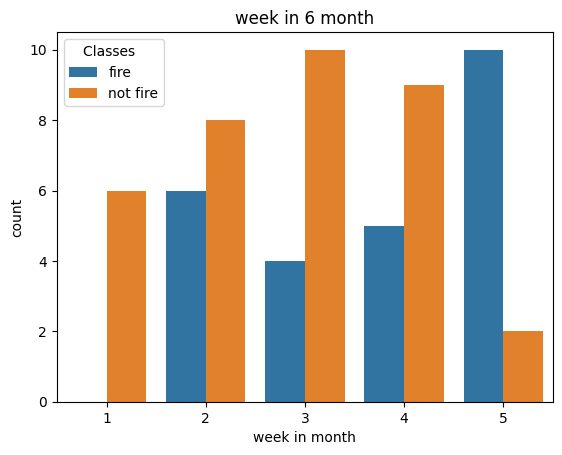

7


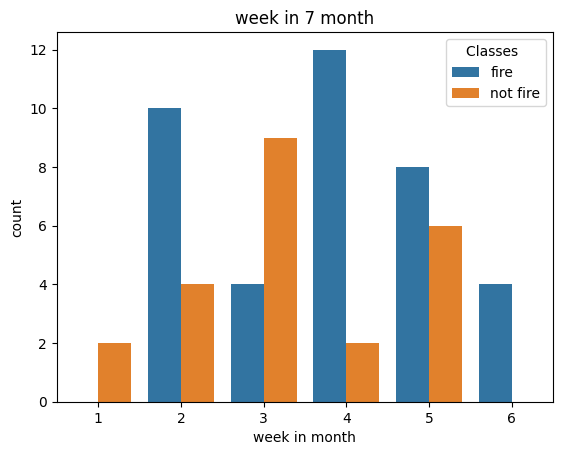

8


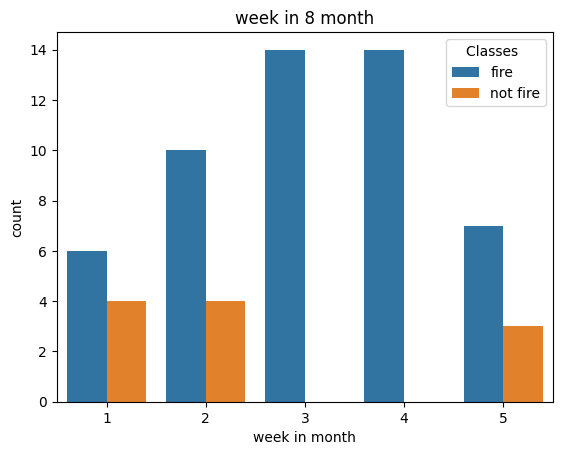

9


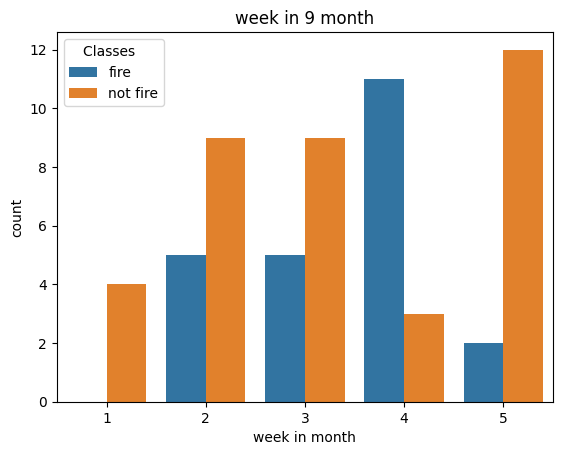

In [66]:
for i in dataset['month'].unique() :
  print(i)
  sns.countplot(data=dataset.loc[dataset['month']==i], x="week in month", hue="Classes  ")
  plt.title(f"week in {i} month")
  plt.show()



In [63]:
len(dataset[dataset['month']==6])

60

In [61]:
len(dataset.loc[dataset['month'] == 6])

60